In [38]:
# importation des bibliothèques
import numpy as np
import pandas as pd 
import matplotlib .pyplot as plt 
import seaborn as sns 

Importation du fichier

In [39]:
df = pd.read_csv("Advertising.csv")

In [40]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


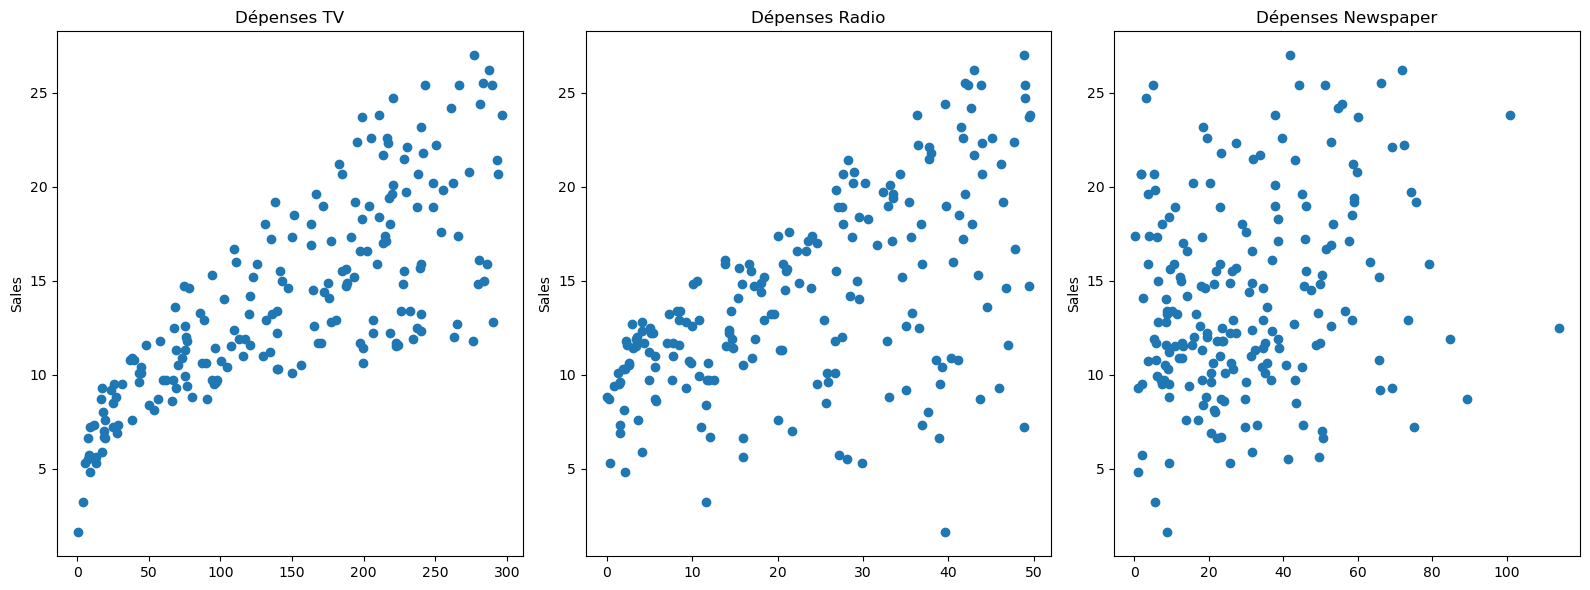

In [41]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("Dépenses TV")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Dépenses Radio")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Dépenses Newspaper");
axes[2].set_ylabel("Sales")
plt.tight_layout();

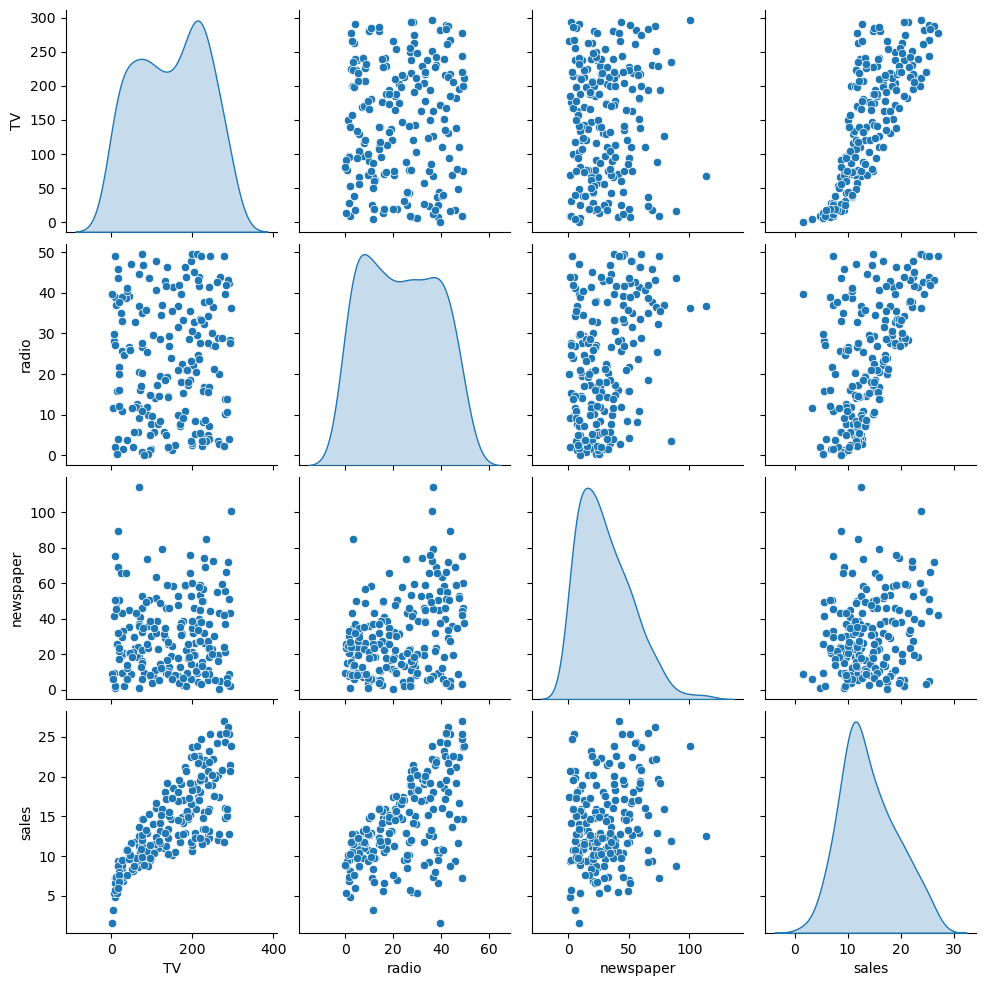

In [43]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# Relation entre les features
sns.pairplot(df,diag_kind='kde');

In [ ]:
X= df.drop('sales',axis=1)

In [44]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [45]:
y=df['sales']

In [46]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [50]:
model.fit(X_train,y_train)

LinearRegression()

In [51]:
test_predictions = model.predict( X_test)

In [52]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
df['sales'].mean()

14.0225

Calcul d'erreur

In [55]:
mean_absolute_error(y_test,test_predictions)

1.2137457736144803

In [56]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.516151937599388

In [57]:
residuals = y_test - test_predictions

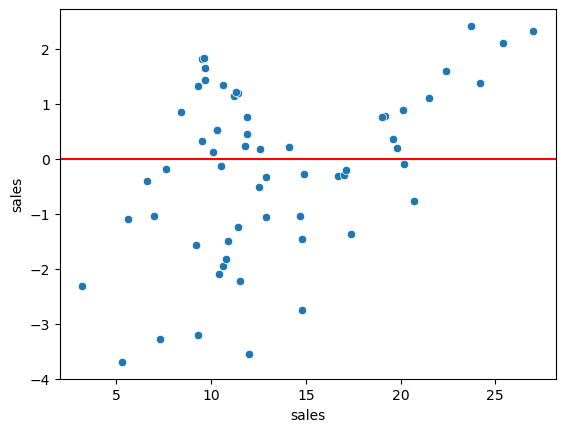

In [58]:
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(y=0, color= 'red', ls='-');

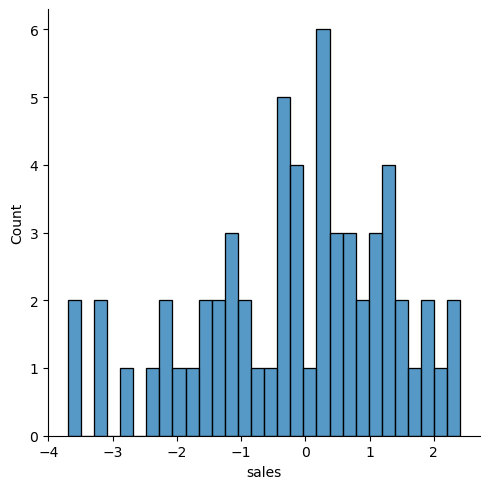

In [65]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.displot(residuals, bins = 30);

In [64]:
import scipy as sp

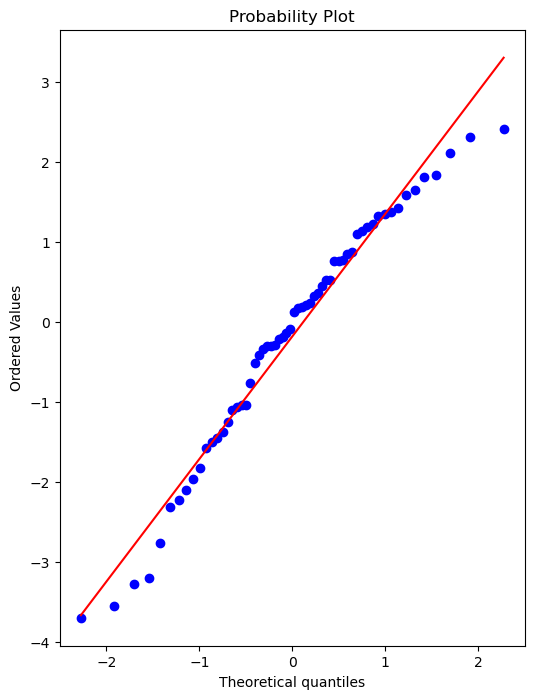

In [63]:
# Créez une figure et un axe pour le tracé
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot renvoie les valeurs brutes si nécessaire
# nous voulons juste voir le graphique, donc nous assignons ces valeurs à _
_ = sp.stats.probplot(residuals,plot=ax)

In [62]:
model_final = LinearRegression()

In [60]:
model_final.fit(X,y)

LinearRegression()

In [61]:
model_final.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [59]:
coeff_df = pd.DataFrame(model_final.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037
